In [17]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd


In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [19]:
# 測試數據生成器
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'E:\Codes\CV train\回收系統dataset\Garbage',  # 替換為您的測試數據目錄
    target_size=(224,224),# 與訓練模型的輸入尺寸一致
    batch_size=32,
    class_mode='categorical',  # 測試集沒有標籤
    shuffle=False  # 測試時不打亂數據順序
)

Found 8079 images belonging to 4 classes.


In [20]:
model = load_model(r"E:\Codes\CV train\回收系統dataset\test.h5", compile=False)


In [21]:
# 進行預測
predictions = model.predict(test_generator, verbose=1)

# 取得預測的類別
predicted_classes = np.argmax(predictions, axis=1)

253/253 [==============================] - 23s 91ms/step


In [22]:
# 獲取測試數據文件名
filenames = test_generator.filenames

# 建立結果數據框
results = pd.DataFrame({
    'Filename': filenames,
    'Prediction': predicted_classes.flatten()
})


In [23]:
# 獲取真實標籤
true_labels = test_generator.classes

# 計算準確率
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"準確率: {accuracy}")

# 顯示詳細分類報告
print(classification_report(true_labels, predicted_classes, digits=4))


準確率: 0.9671989107562817
              precision    recall  f1-score   support

           0     0.9955    1.0000    0.9977      1974
           1     0.9452    0.9596    0.9523      2176
           2     0.9521    0.9400    0.9460      1966
           3     0.9784    0.9699    0.9742      1963

    accuracy                         0.9672      8079
   macro avg     0.9678    0.9674    0.9676      8079
weighted avg     0.9672    0.9672    0.9672      8079



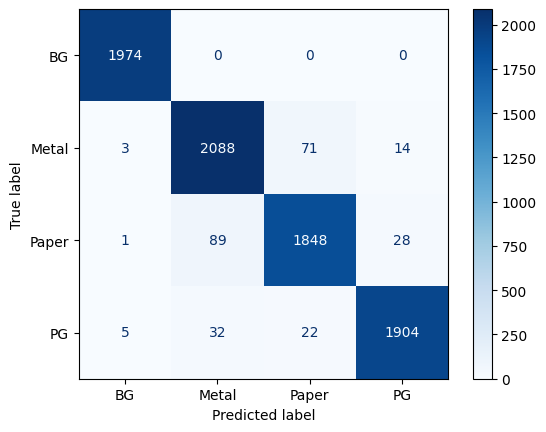

In [24]:
class_names = ['BG', 'Metal', 'Paper', 'PG']  # 根據實際類別名稱修改
cm = confusion_matrix(true_labels, predicted_classes)
cmd_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cmd_display.plot(cmap='Blues', values_format='d')
plt.show()